# Hidden Markov Model with `hmmlearn`
> [Reference](https://hmmlearn.readthedocs.io/en/latest/index.html)

### Import libraries

In [1]:
!pip3 install https://github.com/hmmlearn/hmmlearn/archive/refs/tags/0.2.8.tar.gz

Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/hmmlearn/hmmlearn/archive/refs/tags/0.2.8.tar.gz
  Preparing metadata (setup.py) ... done


In [2]:
from collections import defaultdict
import itertools
import math
import pickle
import random
import urllib

from hmmlearn.hmm import CategoricalHMM, GaussianHMM
from hmmlearn.base import ConvergenceMonitor
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.stride_tricks import as_strided as ast
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

plt.style.use('seaborn-white')

In [3]:
# Ref https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(y_true, y_pred,
                          target_names=None, title='Confusion matrix', cmap=plt.get_cmap('Blues'), normalize=False, figsize=(8,6)):
    '''
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    '''
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## 1. Dice

### 1.1. Evaluation
Probability of given observation with given model

In [4]:
model = CategoricalHMM(n_components=2)  # [FAIR, LOADED]

# Num of observations
model.n_features = 6

# Model (Start probability, transition probability, emission probability)
model.startprob_ = [0.5, 0.5]
model.transmat_ = [
    [0.95, 0.05],
    [0.05, 0.95],
]
model.emissionprob_ = [
    [ 1/6,  1/6,  1/6,  1/6,  1/6, 1/6],
    [1/10, 1/10, 1/10, 1/10, 1/10, 1/2],
]

In [5]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [6]:
# Evaluation
model.score(X) # return log(probability)

-71.28707008782621

#### # Exercise
Write your code in the cells below. (8min)
1. Change Observations
2. Evaluate the probability
3. Repeat 1~2 with different observations

In [7]:
# 1. Change Observations



# 2. Evaluate the probability



# 3. Repeat 1~2 with different observations




### 1.2. Decoding
Most likely sequence of states with given observations and model

In [8]:
model = CategoricalHMM(n_components=2)  # [FAIR, LOADED]

# Num of observations
model.n_features = 6

# Model (Start probability, transition probability, emission probability)
model.startprob_ = [0.5, 0.5]
model.transmat_ = [
    [0.95, 0.05],
    [0.05, 0.95],
]
model.emissionprob_ = [
    [ 1/6,  1/6,  1/6,  1/6,  1/6, 1/6],
    [1/10, 1/10, 1/10, 1/10, 1/10, 1/2],
]

In [9]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [10]:
# Decoding
model.decode(X)

(-74.25710830623268,
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]))

#### # Exercise
Write your code in the cells below. (8min)
1. Change Observations
2. Decode the observations
3. Repeat 1~2 with different observations

In [11]:
# 1. Change Observations



# 2. Decode the observations



# 3. Repeat 1~2 with different observations




### 1.3. Learning
Most likely model with given observations

In [12]:
model = CategoricalHMM(n_components=2, verbose=True, n_iter=20)

In [13]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [14]:
# Learning
model.fit(X)

         1         -92.6027             +nan
         2         -67.7207         +24.8821
         3         -67.5043          +0.2163
         4         -66.1757          +1.3286
         5         -61.2981          +4.8775
         6         -58.8780          +2.4201
         7         -58.6089          +0.2691
         8         -58.5856          +0.0233
         9         -58.5831          +0.0025


CategoricalHMM(n_components=2, n_iter=20,
               random_state=RandomState(MT19937) at 0x7F9C1C681D40,
               verbose=True)

#### 1.3.1. Inside of the Trained Model

In [15]:
model.emissionprob_

array([[2.38985543e-01, 6.70313438e-09, 1.58631702e-01, 5.47932523e-02,
        3.61584060e-29, 5.47589496e-01],
       [1.83026801e-01, 2.22544360e-01, 9.90226769e-08, 2.42791593e-01,
        1.48362917e-01, 2.03274230e-01]])

In [16]:
model.startprob_

array([2.01028941e-20, 1.00000000e+00])

In [17]:
model.transmat_

array([[9.99999116e-01, 8.84196432e-07],
       [7.41830169e-02, 9.25816983e-01]])

### 1.4. Predict
Predict next observations and states

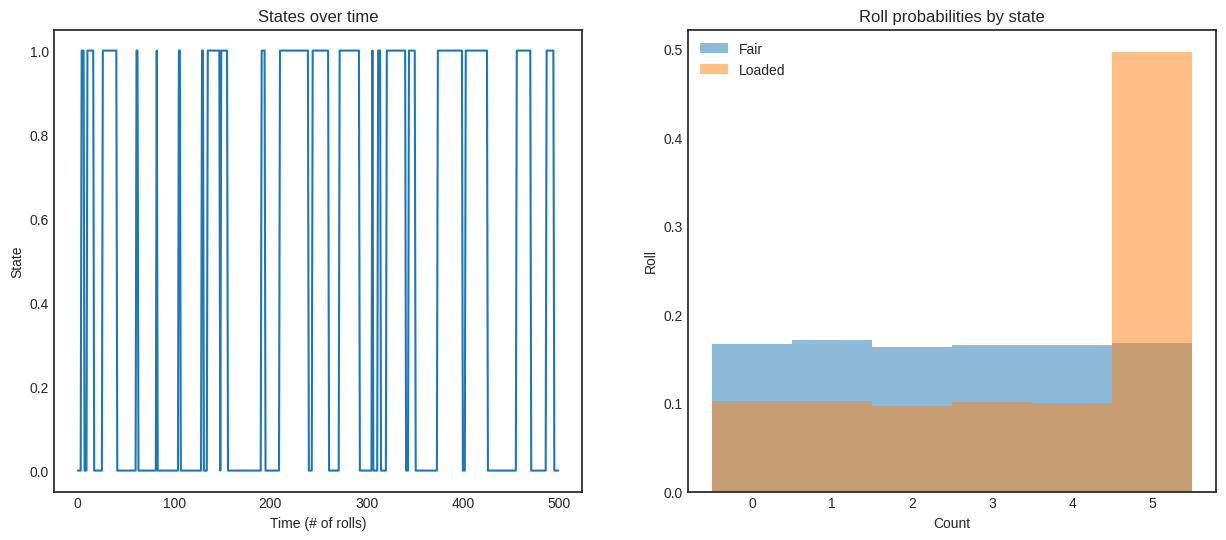

In [18]:
model = CategoricalHMM(n_components=2, random_state=0)

model.startprob_ = np.array([1.0, 0.0])

model.transmat_ = np.array([[0.95, 0.05],
                            [0.1, 0.9]])

model.emissionprob_ = np.array([[1/6,  1/6,  1/6,  1/6,  1/6,  1/6],
                                [1/10, 1/10, 1/10, 1/10, 1/10, 1/2]])

observations, states = model.sample(n_samples=30000)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax = axes[0]
ax.plot(states[:500])
ax.set_title('States over time')
ax.set_xlabel('Time (# of rolls)')
ax.set_ylabel('State')

ax = axes[1]
ax.hist(observations[states == 0], label='Fair',   alpha=0.5, bins=np.arange(7) - 0.5, density=True)
ax.hist(observations[states == 1], label='Loaded', alpha=0.5, bins=np.arange(7) - 0.5, density=True)
ax.set_title('Roll probabilities by state')
ax.set_xlabel('Count')
ax.set_ylabel('Roll')
ax.legend()

plt.show()

In [19]:
X_train = observations[:observations.shape[0] // 2]
X_val = observations[observations.shape[0] // 2:]

# check optimal score
score = model.score(X_val)

best_score = best_model = None
n_fits = 50
for idx in range(n_fits):
    model = CategoricalHMM(n_components=2, random_state=idx, init_params='se')  # don't init transition
    model.transmat_ = np.array([np.random.dirichlet([0.9, 0.1]), np.random.dirichlet([0.1, 0.9])])
    model.fit(X_train)
    score = model.score(X_val)
    print(f'Model #{idx}\tScore: {score}')
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

print(f'Generated score: {score}\nBest score: {best_score}')

Model #0	Score: -26288.680511873044
Model #1	Score: -26287.65928777138
Model #2	Score: -26150.826067896287
Model #3	Score: -26132.27283186221
Model #4	Score: -26288.633448495904
Model #5	Score: -26287.6402450601
Model #6	Score: -26114.614160165584
Model #7	Score: -26149.578038890148
Model #8	Score: -26288.694775800668
Model #9	Score: -26176.31990740239
Model #10	Score: -26133.414988020122
Model #11	Score: -26177.78238126702
Model #12	Score: -26132.135982498214
Model #13	Score: -26258.555112868224
Model #14	Score: -26108.228850945616
Model #15	Score: -26100.972749081924
Model #16	Score: -26285.010938355183
Model #17	Score: -26288.725562392337
Model #18	Score: -26285.076976264176
Model #19	Score: -26287.657659196288
Model #20	Score: -26286.15619244456
Model #21	Score: -26090.747642046
Model #22	Score: -26132.76108827093
Model #23	Score: -26288.22455252234
Model #24	Score: -26168.67868249734
Model #25	Score: -26274.72782331401
Model #26	Score: -26203.97235999054
Model #27	Score: -26288.71

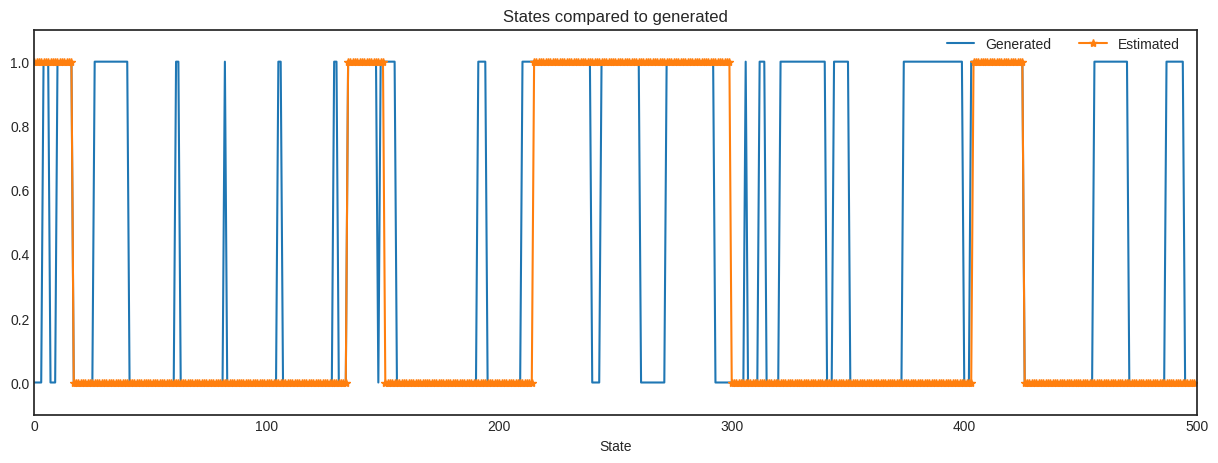

In [20]:
pred_states = best_model.predict(observations)

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(states[:500],      label='Generated')
ax.plot(pred_states[:500], marker='*', label='Estimated')

ax.set_xlim(0, 500)
ax.set_ylim(-0.1, 1.1)
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# observations)')
ax.set_xlabel('State')
ax.legend(ncol=2, loc=[0.78, 0.93])
plt.show()

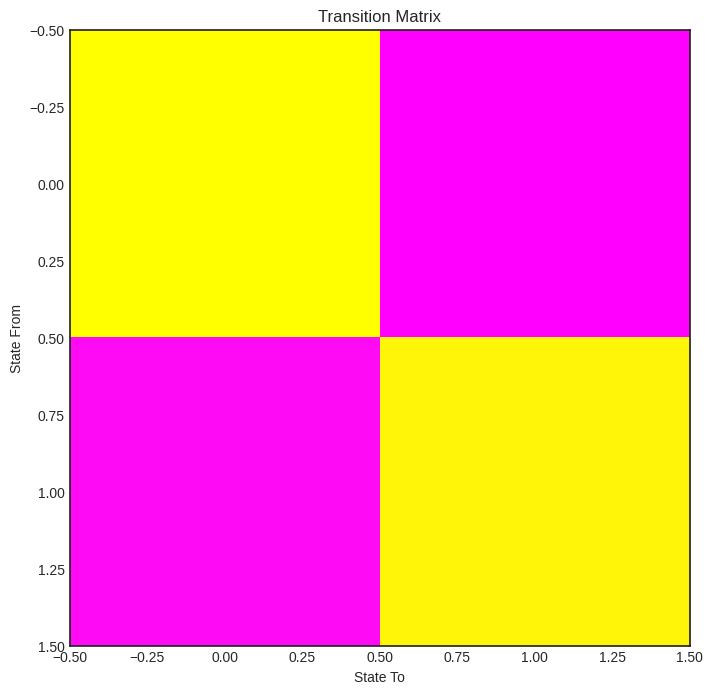

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(best_model.transmat_, aspect='auto', cmap='spring')

ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')

plt.show()

---
## 2. HAR with HMM
### 2.1. Using Segments
#### 2.1.1. Load data

In [22]:
### Modify the data path to your own setting ###
X, y = pickle.load(urllib.request.urlopen('https://github.com/snuhcs/time-series-2022/raw/master/Data/HAR_segments_for_HMM.pkl'))

print(type(X), type(y), len(X), len(y))
print(type(X[0]), X[0].shape, set(y))

<class 'list'> <class 'list'> 30 30
<class 'numpy.ndarray'> (3072, 3) {'standing', 'running', 'walking'}


#### 2.1.2. Plot data

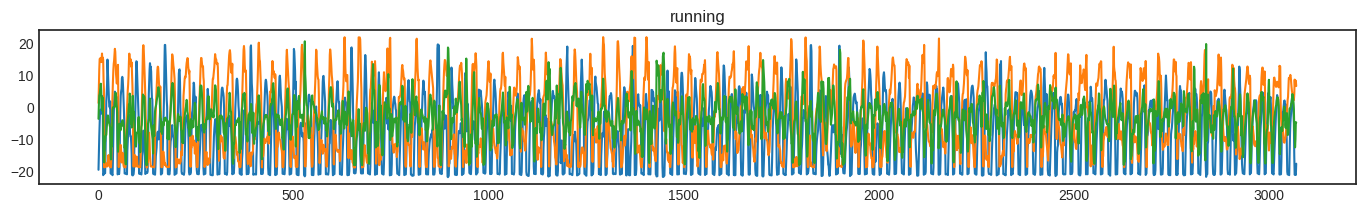

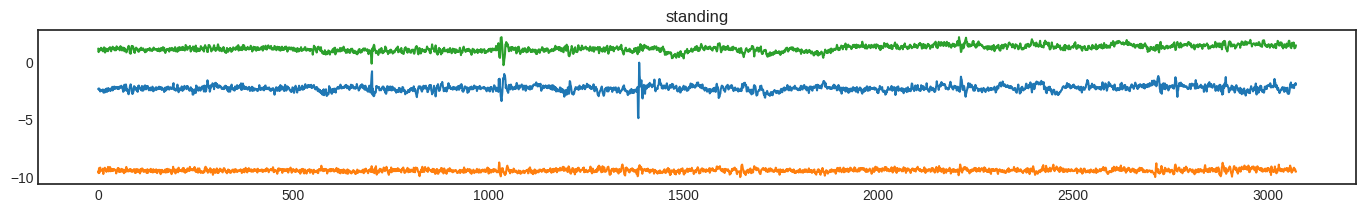

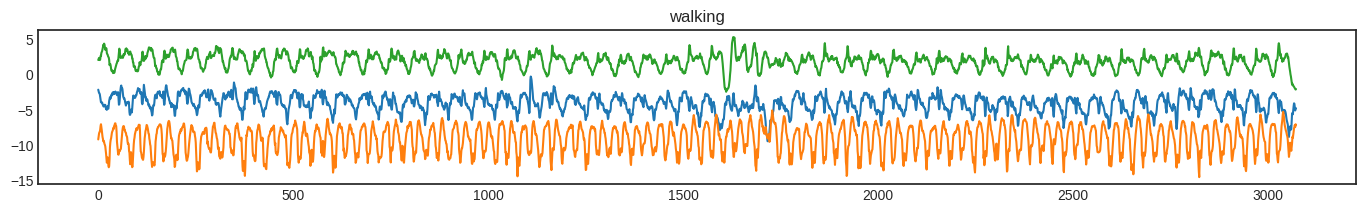

In [23]:
plt.rcParams['figure.figsize'] = (17, 2)

plt.title(y[0])
plt.plot(X[0])
plt.show()

plt.title(y[10])
plt.plot(X[10])
plt.show()

plt.title(y[20])
plt.plot(X[20])
plt.show()

#### 2.1.3. Map Label

In [24]:
# Mapping label
classes = sorted(list(set(y)))
class_to_index = {c:i for i, c in enumerate(classes)}
index_to_class = {i:c for i, c in enumerate(classes)}
print(class_to_index)

{'running': 0, 'standing': 1, 'walking': 2}


#### 2.1.4. Train Model
To fit with multiple observations, hmmlearn provides `hmm.fit(X_concat, lengths)`

In [25]:
# Make HMM models per motion classes
hmms = [GaussianHMM(n_components=5, n_iter=30) for c in classes]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Process training data
X_train_dict = defaultdict(lambda: [])
lengths_dict = defaultdict(lambda: [])
for segment, motion in zip(X_train, y_train):
    X_train_dict[motion].append(segment)
    lengths_dict[motion].append(segment.shape[0])

# Fit HMM models per motion classes
for motion in classes:
    X_concat = np.vstack(X_train_dict[motion])
    lengths = lengths_dict[motion]
    
    hmms[class_to_index[motion]].fit(X_concat, lengths)

#### 2.1.5. Test Model

In [26]:
def _predict(segment):
    '''
    Evaluate with multiple HMMs (HMM model per motion class)
    Choose most likely motion class
    '''
    probs = [hmm.score(segment) for hmm in hmms]
    index = np.argmax(probs)
    return index_to_class[index]

def predict(segments):
    return [_predict(segment) for segment in segments]
    
y_pred = predict(X_test)
y_true = y_test

              precision    recall  f1-score   support

     running       1.00      1.00      1.00         3
    standing       1.00      0.33      0.50         3
     walking       0.60      1.00      0.75         3

    accuracy                           0.78         9
   macro avg       0.87      0.78      0.75         9
weighted avg       0.87      0.78      0.75         9



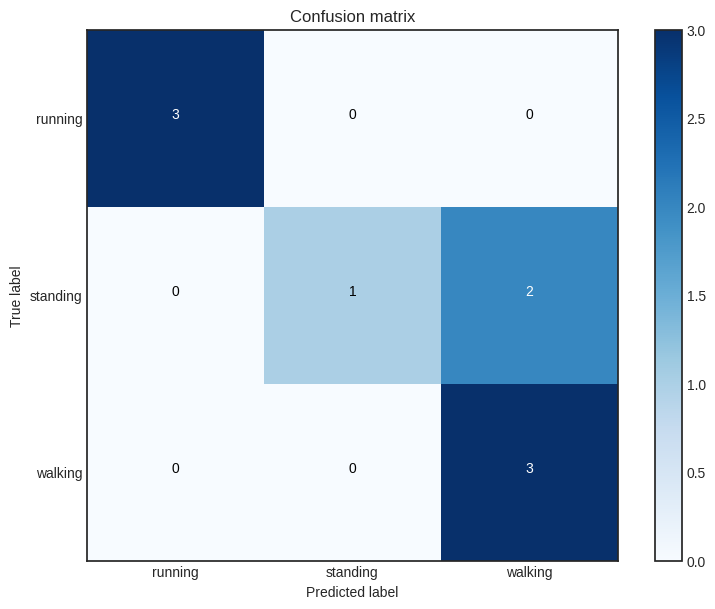

In [27]:
print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred, classes)

### 2.2. Using Sliding Window
#### 2.2.1. Load data

In [28]:
### Modify the data path to your own setting ###
X, y = pickle.load(urllib.request.urlopen('https://github.com/snuhcs/time-series-2022/raw/master/Data/HAR_slices_for_HMM.pkl'))

print(type(X), type(y), len(X), len(y))
print(type(X[0]), X[0].shape, set(y))

<class 'list'> <class 'list'> 2940 2940
<class 'numpy.ndarray'> (150, 3) {'standing', 'running', 'walking'}


#### 2.2.2. Plot data

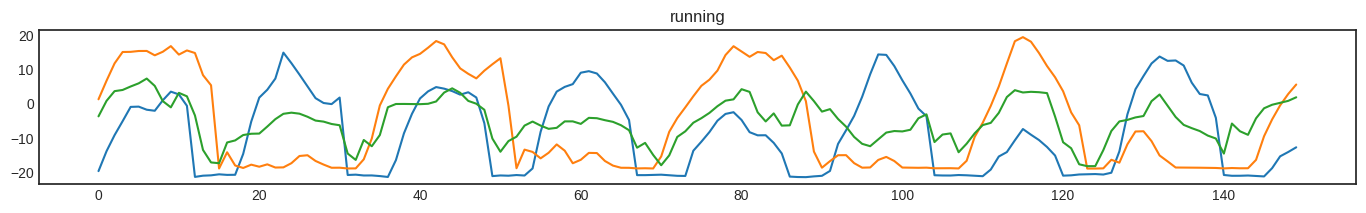

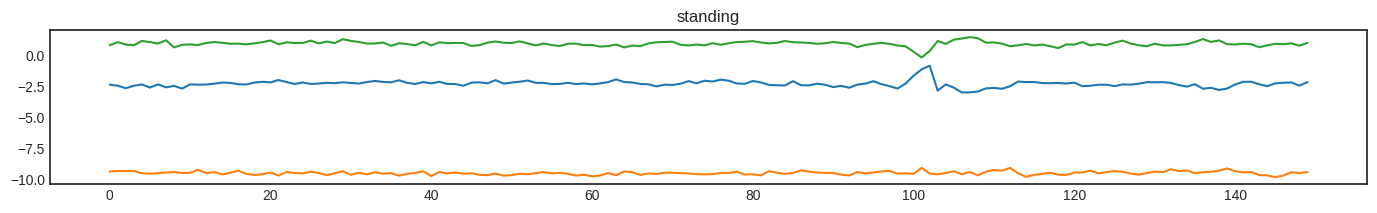

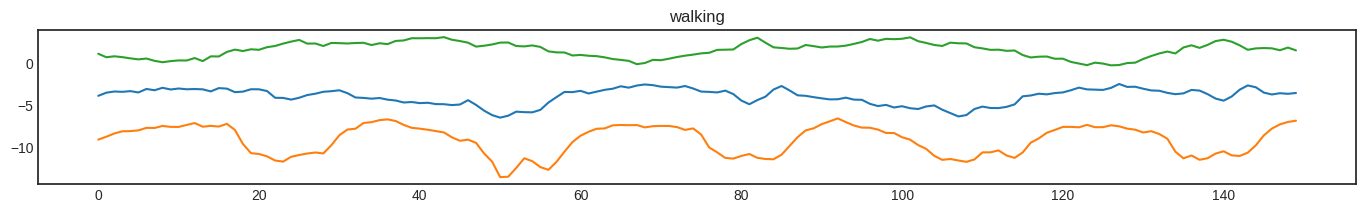

In [29]:
plt.rcParams['figure.figsize'] = (17, 2)

plt.title(y[0])
plt.plot(X[0])
plt.show()

plt.title(y[1000])
plt.plot(X[1000])
plt.show()

plt.title(y[2000])
plt.plot(X[2000])
plt.show()

#### 2.2.3. Map Label

In [30]:
# Mapping label
classes = sorted(list(set(y)))
class_to_index = {c:i for i, c in enumerate(classes)}
index_to_class = {i:c for i, c in enumerate(classes)}
print(class_to_index)

{'running': 0, 'standing': 1, 'walking': 2}


#### 2.2.4. Train Model
To fit with multiple observations, hmmlearn provides `hmm.fit(X_concat, lengths)`

In [31]:
# Make HMM models per motion classes
hmms = [GaussianHMM(n_components=5, n_iter=30)
        for c in classes]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Process training data
X_train_dict = defaultdict(lambda: [])
lengths_dict = defaultdict(lambda: [])
for slide, motion in zip(X_train, y_train):
    X_train_dict[motion].append(slide)
    lengths_dict[motion].append(slide.shape[0])

# Fit HMM models per motion classes
for motion in classes:
    X_concat = np.vstack(X_train_dict[motion])
    lengths = lengths_dict[motion]
    
    hmms[class_to_index[motion]].fit(X_concat, lengths)

#### 2.2.5. Test Model

In [32]:
def _predict(sample_window):
    '''
    Evaluate with multiple HMMs (HMM model per motion class)
    Choose most likely motion class
    '''
    probs = [hmm.score(sample_window) for hmm in hmms]
    index = np.argmax(probs)
    return index_to_class[index]

def predict(sample_windows):
    return [_predict(sample_window) for sample_window in sample_windows]
    
y_pred = predict(X_test)
y_true = y_test

              precision    recall  f1-score   support

     running       1.00      1.00      1.00       245
    standing       1.00      1.00      1.00       245
     walking       1.00      1.00      1.00       245

    accuracy                           1.00       735
   macro avg       1.00      1.00      1.00       735
weighted avg       1.00      1.00      1.00       735



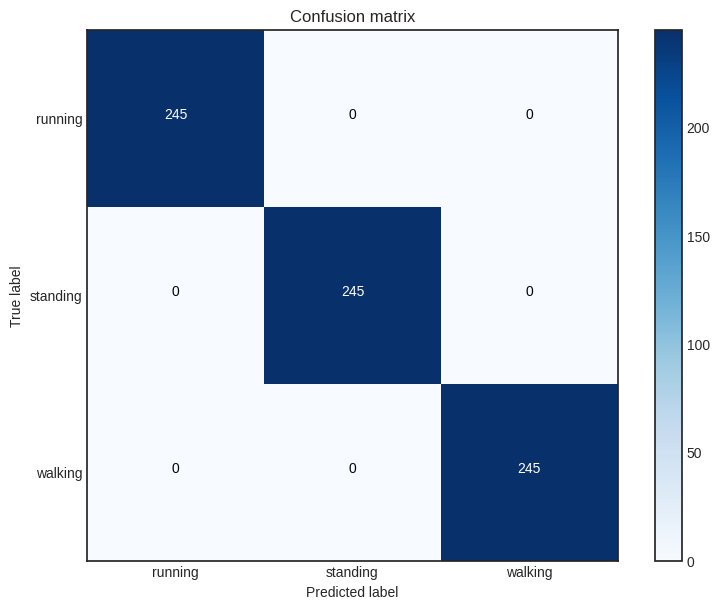

In [33]:
print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred, classes)

## 3. Flip Coin
There are two coins, FAIR and LOADED.<br/>
Problem modeling is given in the next cell.

### 3.1. Modeling

In [34]:
hmm = CategoricalHMM(n_components=2)  # [FAIR, LOADED]

# Num of observations (Front, Back)
hmm.n_features = 2

# Model (Start probability, transition probability, emission probability)
hmm.startprob_ = [0.2, 0.8]
hmm.transmat_ = [
    [0.7, 0.3],
    [0.3, 0.7],
]
hmm.emissionprob_ = [
    [0.5, 0.5],
    [0.8, 0.2],
]

In [35]:
# Observations
X = np.array([0, 1]).reshape(-1,1)

### 3.2. Evaluation

In [36]:
# Evaluation
hmm.score(X) # return log(probability)

-1.4845689303882312

#### # Exercise - Evaluation
Calculate probability of given sequence with our own hands.

### 3.2. Decoding

In [37]:
# Decoding
hmm.decode(X)

(-2.3434070875143007, array([1, 0]))

#### # Exercise - Decoding
Estimate most likely sequence of states with given observations and model with our own hands.